### Prerequisites:
* "vectors and matrices.ipynb"
* "waves_and_oscillations.ipynb"

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Light as a "static" plane wave

In [2]:
A = 1+ 0*1j
lambd = 1053e-9
z = np.arange(-5.0*lambd,5.0*lambd,1e-9)
k = (2.0*np.pi)/lambd
omega = k*299792458
U = A*np.exp(-1j*k*z)

# Plotting the complex amplitude (of a plane wave)

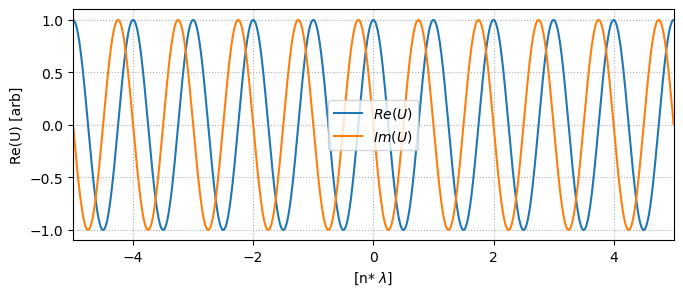

In [3]:
plt.figure(figsize=[7.75,3])
#ax = plt.axes()
#ticks=np.arange(-3.5*np.pi,4.0*np.pi, np.pi/2.0)
#ax.set_xticks(ticks)
#ax.set_xticklabels([r'-$7/2 \pi$', r'-$ 3\pi$', r'-$5/2 \pi$', r'-$2\pi$', r'-$3/2 \pi$', r'-$\pi$', r'-$1/2 \pi$', r'0', r'$1/2 \pi$', r'$\pi$', r'$3/2 \pi$', r'$2\pi$', r'$5/2 \pi$', r'3$\pi$', r'$7/2 \pi$'])
plt.plot(z/lambd, np.real(U), label=r'$Re(U)$')
plt.plot(z/lambd, np.imag(U), label=r'$Im(U)$')
plt.legend()
plt.xlim(z[0]/lambd, z[-1]/lambd)
plt.ylabel('Re(U) [arb]')
plt.xlabel('[n* $\lambda$]')
plt.grid(linestyle='dotted')

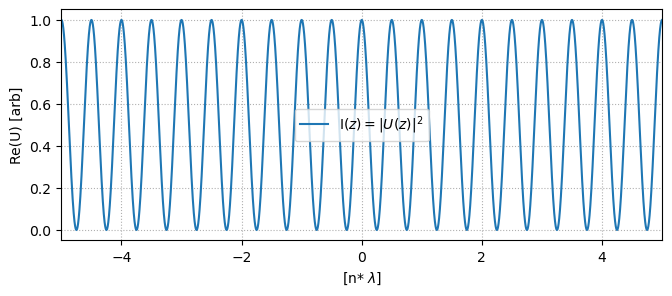

In [4]:
# Plotting (values of) Intensity
plt.figure(figsize=[7.75,3])
plt.plot(z/lambd, np.abs(np.real(U)**2),label=r'$\mathrm{I}(z) = |U(z)|^{2}$')
plt.legend()
plt.xlim(z[0]/lambd, z[-1]/lambd)
plt.ylabel('Re(U) [arb]')
plt.xlabel('[n* $\lambda$]')
plt.grid(linestyle='dotted')

In [13]:
#Defining aspect ratio
zscale = 12.0
yscale =2.0

# The planar wave in 2-D

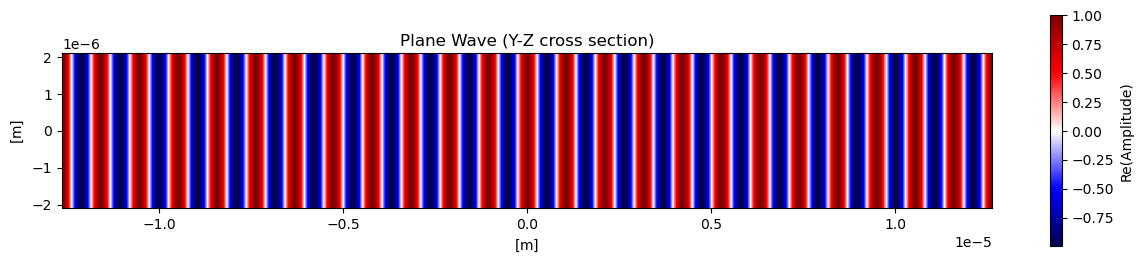

In [14]:
plt.figure(figsize=[15,3])
# Define the grid
z = np.arange(-zscale*lambd,zscale*lambd,1e-9)
y = np.arange(-yscale*lambd,yscale*lambd,1e-9)
Z, Y = np.meshgrid(z,y)

U_ =  A*np.exp(-1j*k*Z)

# Plot the heatmap
plt.imshow(np.real(U_), extent=(-zscale*lambd, zscale*lambd, -yscale*lambd, yscale*lambd), origin='lower', cmap='seismic')
plt.colorbar(label='Re(Amplitude)')
plt.title('Plane Wave (Y-Z cross section)')
plt.xlabel('Z')
plt.ylabel('Y')
plt.ylabel('[$\mathrm{m}$]')
plt.xlabel('[$\mathrm{m}$]')
plt.show()

# Spherical waves

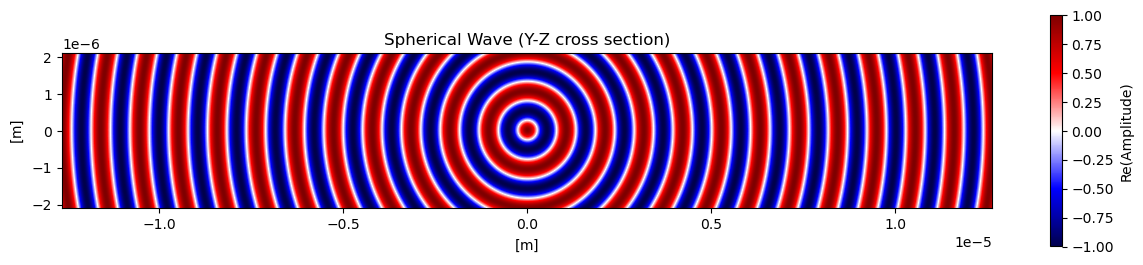

In [15]:
plt.figure(figsize=[15,3])
z = np.arange(-zscale*lambd,zscale*lambd,1e-9)
y = np.arange(-yscale*lambd,yscale*lambd,1e-9)
Z, Y = np.meshgrid(z,y)

U__ =  A*np.exp(-1j*k*np.sqrt(Z**2 + Y**2))
# Plot the heatmap
plt.imshow(np.real(U__), extent=(-zscale*lambd, zscale*lambd, -yscale*lambd, yscale*lambd), origin='lower', cmap='seismic')
plt.colorbar(label='Re(Amplitude)')
plt.title('Spherical Wave (Y-Z cross section)')
plt.xlabel('[$\mathrm{m}$]')
plt.ylabel('[$\mathrm{m}$]')
plt.show()

# The Paraxial Approximation and the Gaussian Beam

An approximation imposed onto the Helmholtz equation leads to a "parabolic" wavefront. The assumption is that the longitudinal axis of propogation (in most cases, we assign the wave vector direction to coalign to the z-axis) is much MUCH larger than the points we care to look at along the transverse axes (x and y axes). Or another way to say it: we have a very well defined axis of propogation (z-axis) with little interest in large deviations from said propogation axis.

In [16]:
def gaussian_beam(k,omega,z,x,y,w0,t):
    zr=np.pi*(w0**2.0)*k/2.0/np.pi
    rho_sq=x**2.0+y**2.0
    w=w0*np.sqrt(1.0+(z/zr)**2.0)
    R=z*(1.0+(zr/z)**2.0)
    gouy=np.arctan(z/zr)
    U=w0*np.exp(-rho_sq/w**2.0)*np.exp(1j*(k*z+k*rho_sq/(2.0*R)-gouy))*np.exp(-1j*omega*t)/w
    return(U)

In [17]:
y=np.arange(-yscale*lambd,yscale*lambd,1e-9)
z=np.arange(-zscale*lambd,zscale*lambd,1e-9)
Z,Y=np.meshgrid(z,y)

In [22]:
U___=gaussian_beam(k,omega,Z,Y,Y,.8e-6,0)

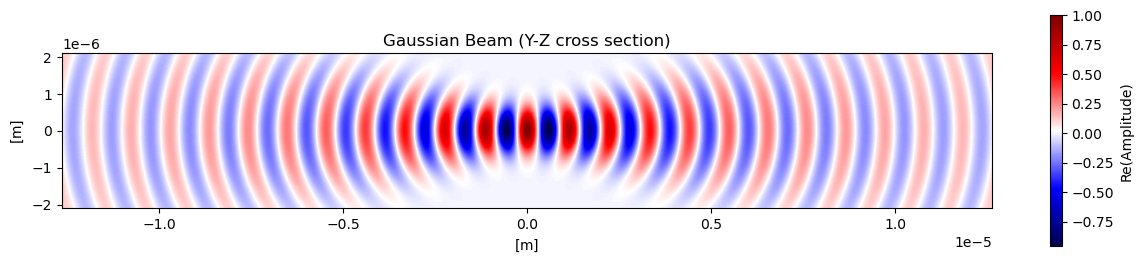

In [23]:
plt.figure(figsize=[15,3])
plt.imshow(np.real(U___),cmap='seismic', extent=(-zscale*lambd, zscale*lambd, -yscale*lambd, yscale*lambd), origin='lower')
plt.colorbar(label='Re(Amplitude)')
plt.title('Gaussian Beam (Y-Z cross section)')
plt.xlabel('[$\mathrm{m}$]')
plt.ylabel('[$\mathrm{m}$]')
plt.show()

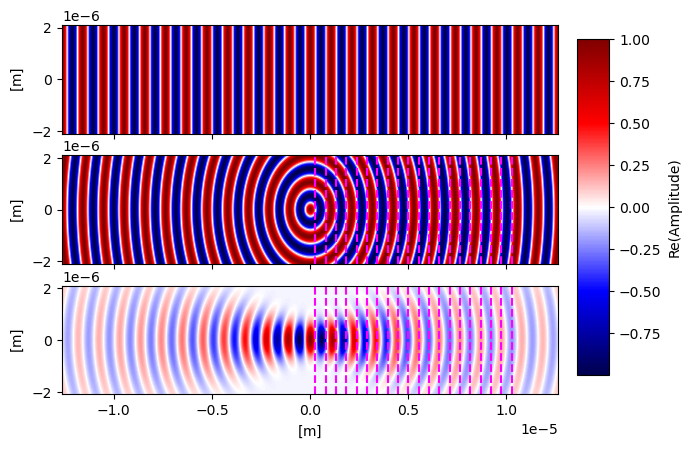

In [24]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, squeeze=True)
# Define the grid
z = np.arange(-zscale*lambd,zscale*lambd,1e-9)
y = np.arange(-yscale*lambd,yscale*lambd,1e-9)

# Plot the heatmap
im1 = ax1.imshow(np.real(U_), extent=(-zscale*lambd, zscale*lambd, -yscale*lambd, yscale*lambd), origin='lower', cmap='seismic',aspect='auto')
ax2.imshow(np.real(U__), extent=(-zscale*lambd, zscale*lambd, -yscale*lambd, yscale*lambd), origin='lower', cmap='seismic', aspect='auto')
ax3.imshow(np.real(U___), extent=(-zscale*lambd, zscale*lambd, -yscale*lambd, yscale*lambd), origin='lower', cmap='seismic', aspect='auto')
ax1.set_ylabel('[$\mathrm{m}$]')
ax2.set_ylabel('[$\mathrm{m}$]')
ax3.set_xlabel('[$\mathrm{m}$]')
ax3.set_ylabel('[$\mathrm{m}$]')

for n in range(0,20):
    ax2.vlines(lambd/4.0 + (lambd*2.0*n)/4.0 ,-2.0*lambd,2.0*lambd, color='magenta', linestyle='--')
    ax3.vlines(lambd/4.0 + (lambd*2.0*n)/4.0 ,-2.0*lambd,2.0*lambd, color='magenta', linestyle='--')

cbar_ax = f.add_axes([.93, 0.15, 0.05, 0.7])
f.colorbar(im1,cax=cbar_ax, label='Re(Amplitude)')

# Properties of the Gaussian Beam

Neither purely planar or spherical but can imagine as a mixture of properties from both planar and spherical:
